In [1]:
%matplotlib inline
import pylab as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
f = '/Users/franzliem/Dropbox/LeiCA/LIFE/subjects_lists/120_all_available_subjects_n2559.pkl'
df = pd.read_pickle(f)

In [3]:
g = df.groupby('sex')
g.count()

,age,mean_FD_P,max_FD_P,n_TRs
sex,,,,
F,1196,1196,1196,1196
M,1363,1363,1363,1363


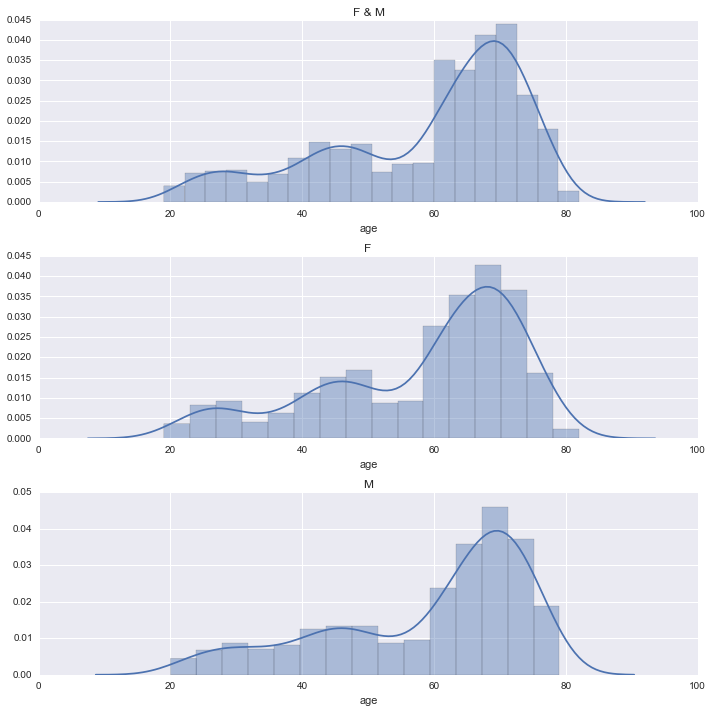

In [4]:
fig, ax = plt.subplots(3,figsize=(10,10))
sns.distplot(df.age, ax=ax[0])
sns.distplot(df.age[df.sex=='F'], ax=ax[1])
sns.distplot(df.age[df.sex=='M'], ax=ax[2])

ax[0].set_title('F & M')
ax[1].set_title('F')
ax[2].set_title('M')
fig.tight_layout()

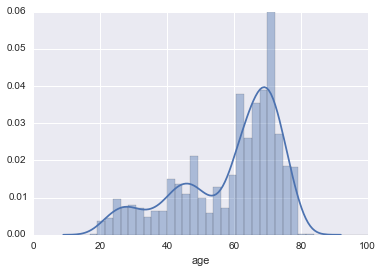

In [18]:
bins = np.linspace(10, 100, 40)
sns.distplot(df.age, bins=bins)

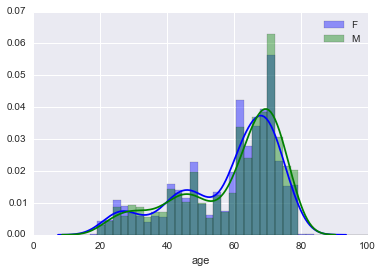

In [19]:
sns.distplot(df[df.sex=='F'].age, color='b', label='F', bins=bins)
sns.distplot(df[df.sex=='M'].age, color='g', label='M', bins=bins)
plt.legend()
plt.savefig('/Users/franzliem/Desktop/aa.pdf')

/Users/franzliem/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


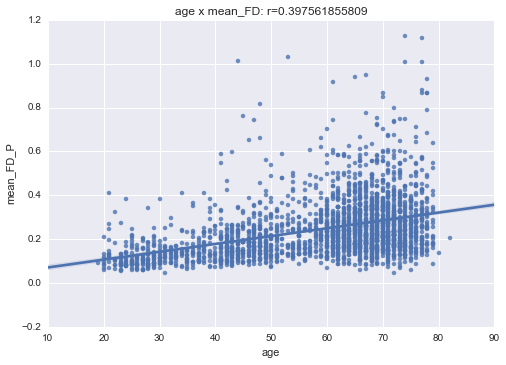

In [4]:
sns.regplot(df.age, df.mean_FD_P)
plt.title('age x mean_FD: r=%s'%df.corr()['age']['mean_FD_P'])

/Users/franzliem/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


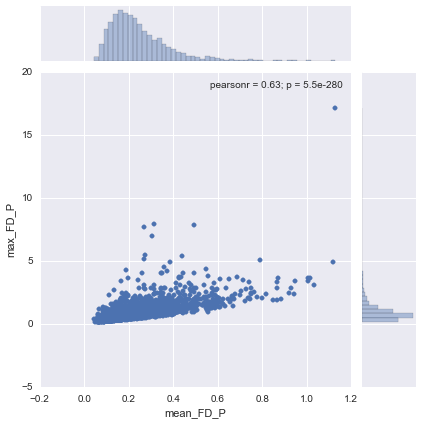

In [20]:
sns.jointplot(x="mean_FD_P", y="max_FD_P", data=df);

In [58]:
df.corr()

,age,mean_FD_P,max_FD_P,n_TRs
age,1.000000,0.397562,0.230838,0.023820
mean_FD_P,0.397562,1.000000,0.627307,0.030212
max_FD_P,0.230838,0.627307,1.000000,0.009155
n_TRs,0.023820,0.030212,0.009155,1.000000


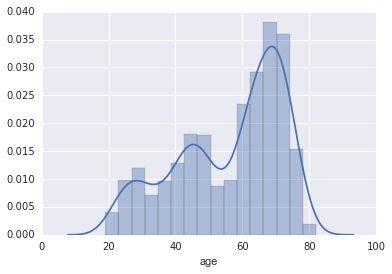

In [59]:
sns.distplot(df.age[df.mean_FD_P<.3])

In [6]:
#

1418


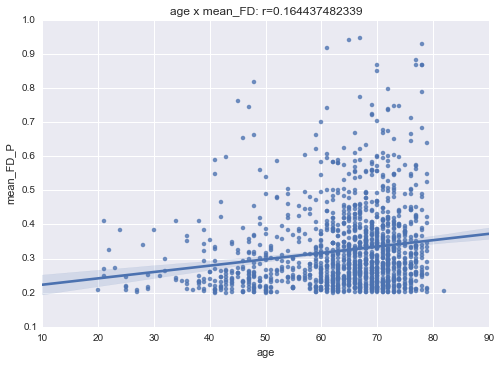

In [10]:
fd_cut = 1
fd_cut_low = 0.2
df_sel = df[(df.mean_FD_P<fd_cut) & (df.mean_FD_P>fd_cut_low)]
sns.regplot(df_sel.age, df_sel.mean_FD_P)
plt.title('age x mean_FD: r=%s'%df_sel.corr()['age']['mean_FD_P'])
print(len(df_sel))

In [85]:
bins=np.concatenate((np.atleast_1d(0), range(30,71,10), np.atleast_1d(90)))
labels=np.concatenate((np.atleast_1d(20), range(30,71,10)))

df['age_bin'] = pd.cut(df.age, bins, labels=labels)

In [52]:
print labels

[20 30 40 50 60 70]


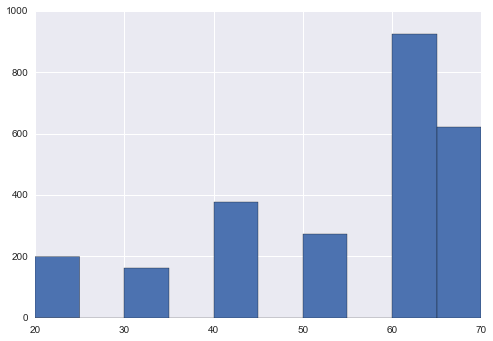

In [53]:
df.age_bin.hist()

161

In [130]:
g = df.groupby(df.age_bin)
min_n = g.count()[['age']].min().values
df['uniform_sample'] = False

for b in labels:
    n_age_bin = len(df.loc[df.age_bin==b])
    random_selector = np.concatenate((np.ones(min_n).astype(bool), np.zeros(n_age_bin-min_n).astype(bool)))
    np.random.shuffle(random_selector)
    df.loc[df.age_bin==b, 'uniform_sample'] = random_selector

# include random sampling with same size
n_rand = len(labels)*min_n
random_sample = np.concatenate((np.ones(n_rand).astype(bool), np.zeros(len(df)-n_rand).astype(bool)))
np.random.shuffle(random_sample)
df['random_sample'] = random_sample

f_out = '/Users/franzliem/Dropbox/LeiCA/LIFE/subjects_lists/120_all_available_subjects_n2559_wSubsamples.pkl'
df.to_pickle(f_out)

In [125]:
df_s = df.loc[df['random_sample']]
df_s.head()

,sex,age,mean_FD_P,max_FD_P,n_TRs,uniform_sample,age_bin,random_sample
LI02271735,M,37,0.196809,3.592294,295,True,30,True
LI02793658,F,39,0.126167,0.441374,295,True,30,True
LI00715551,F,60,0.311360,0.669040,295,True,50,True
LI03131716,M,66,0.321511,0.900471,295,True,60,True
LI04918298,F,55,0.215208,0.970595,295,False,50,True


966


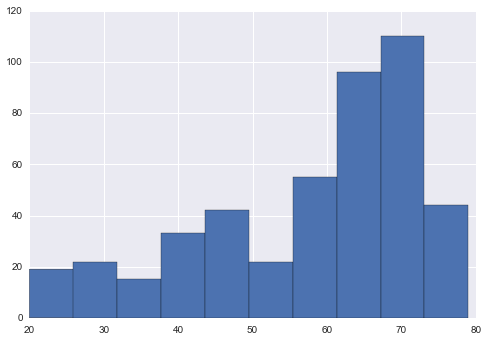

In [129]:
print(len(df_s))
df_s.age.loc[df.sex=='F'].hist()

In [128]:
g = df_s.groupby(df_s.age_bin)
g.count()

,sex,age,mean_FD_P,max_FD_P,n_TRs,uniform_sample,random_sample
age_bin,,,,,,,
20,76,76,76,76,76,76,76
30,59,59,59,59,59,59,59
40,133,133,133,133,133,133,133
50,104,104,104,104,104,104,104
60,371,371,371,371,371,371,371
70,223,223,223,223,223,223,223


In [33]:
np.concatenate?